# **Prediction using Supervised ML**

Predicting the percentage of marks of a student based on the number of study hours.

# We use Simple Linear Regression as it involves just 2 variables.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### **Import and Explore Data**

Importing the data and exploring the dataset a bit.




In [2]:
marks= "http://bit.ly/w-data"
data= pd.read_csv(marks)
data.shape

(25, 2)

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# Finding correlation among the data

correlation= data.corr(method='pearson')
correlation

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


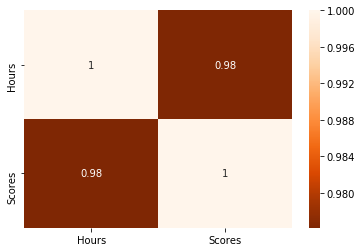

In [5]:
sns.heatmap(correlation, annot=True, cmap='Oranges_r');

### **Relationship between Data**

Plotting data points on 2-D graph to see if we can manually find any 
relationship between the data.

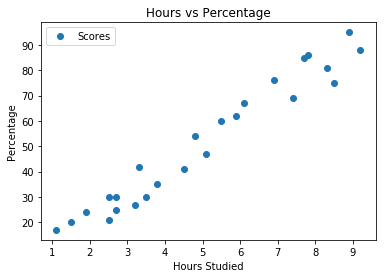

In [6]:
data.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage')
plt.show()

***There is a positive linear relation between the number of hours studied and percentage of score.***

### **Attributes and Values**

The attribute set will consist of the "Hours" column, and the label will be the "Score" column.

We need to split our data into training and testing sets. In this case we have split 80% of the data to training set while 20% of the data to test set.

In [7]:
X = data.iloc[:, :-1].values
X =X.reshape(-1,1)
y = data.iloc[:, 1].values
y = y.reshape (-1,1)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#**Training the Model**

We need to implement linear regression models, import the LinearRegression class, instantiate it, and call the fit() method along with the training data.

In [9]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Linear regression model basically finds the best value for the intercept and slope, which results in a line that best fits the data.

In [10]:
print(regressor.intercept_)

[2.01816004]


In [11]:
print(regressor.coef_)

[[9.91065648]]


***If a student studies one hour more than they previously studied for an exam, they can expect to achieve an increase of 9.91% in the score achieved by the student previously.***

### **Making Predictions**

After we have trained our algorithm, it's time to make some predictions.

We will use our test data and see how accurately our algorithm predicts the percentage score.

In [12]:
print(X_test)
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [28]:
#Reshaping 2-D Array to 1-D Array in order to put into DataFrame
print(y_test)
print(y_pred)
y_test=y_test.reshape(5)
y_pred=y_pred.reshape(5)
print(y_test)
print(y_pred)


[[20 27 69 30 62]]
[[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]]
[20 27 69 30 62]
[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [29]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [30]:
hrs = 9.25
pred = regressor.predict([[hrs]])
print("No of Hours = {}".format(hrs))
print("Predicted Score = {}".format(pred[0]))

No of Hours = 9.25
Predicted Score = [93.69173249]


**Evaluating the Algorithm**

The final step is to evaluate the performance of algorithm.


In [36]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Regression Score:', metrics.r2_score(y_true=y_test, y_pred=y_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
Regression Score: 0.9454906892105356


Value of root mean squared error is 4.64, which is less than 10% of the mean value of the percentages of all the students i.e. 51.48

# Our model prediction is completed, and its accuracy is 94.55% which is quite good.

## Conclusion: Linear Regression is a best fit for this particular training data.